In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import yfinance as yf

In [2]:
settings = {'figure.figsize':(14,4),
            'figure.dpi':144,
            'figure.facecolor':'w',
            'axes.spines.top':False,
            'axes.spines.bottom':False,
            'axes.spines.left':False,
            'axes.spines.right':False,
            'axes.grid':True,
            'grid.linestyle':'--',
            'grid.linewidth':0.5, 
            'figure.constrained_layout.use':True}
plt.rcParams.update(settings)

In [3]:
#### WHERE TO SAVE DATA'
output = "../output_mo_qt/"
figures = "../figures/"	

In [4]:
companies = ["^AEX", "ASML.AS", "AIR","ING", "WKL.AS", "STLA", "AD.AS", "PHG", "^FVX","^TNX", "^TYX", "^VIX"]

combined_Data = []
for i in companies:
    asml1 = yf.Ticker(i)
    hist = asml1.history(period="max")

    #align dates
    stck = pd.DataFrame(hist['Close'])
    stck['newDate'] = stck.index
    stck.index = stck['newDate'].dt.strftime('%Y-%m-%d')
    stck.drop(columns=['newDate'], inplace=True)
    stck.columns = [i]

    combined_Data.append(stck)


In [5]:
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), combined_Data)
df_merged.index = pd.to_datetime(df_merged.index)
df_merged.tail()

,^AEX,ASML.AS,AIR,ING,WKL.AS,STLA,AD.AS,PHG,^FVX,^TNX,^TYX,^VIX
newDate,,,,,,,,,,,,
2024-12-24,876.260010,688.500000,60.930000,15.62,159.500000,13.07,31.240000,25.48,4.438,4.591,4.765,14.270000
2024-12-26,NaN,NaN,61.049999,15.68,NaN,13.02,NaN,25.77,4.433,4.579,4.762,14.730000
2024-12-27,879.700012,684.900024,60.400002,15.63,161.000000,13.07,31.379999,25.57,4.456,4.619,4.811,15.950000
2024-12-30,871.799988,671.900024,61.119999,15.66,159.449997,13.04,31.250000,25.34,4.370,4.545,4.763,17.400000
2024-12-31,876.250000,675.200012,NaN,NaN,159.699997,NaN,31.350000,NaN,NaN,NaN,NaN,16.790001


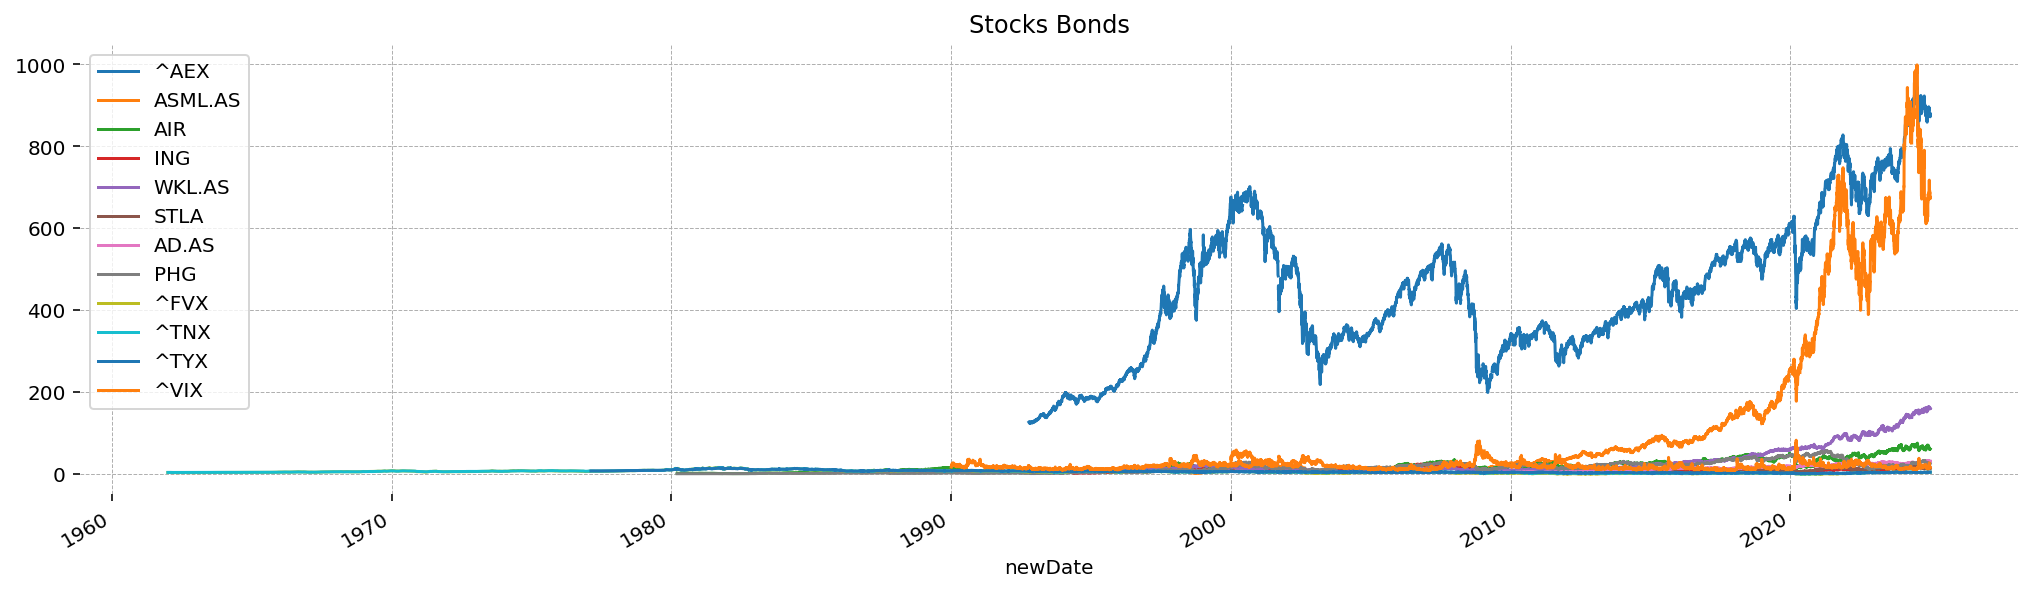

In [6]:

df_merged.plot(title='Stocks Bonds', grid=True);

In [7]:
aex_monthly = df_merged.resample('1MS').mean()
aex_monthly = aex_monthly.loc["1995-01-01":,]

aex_monthly.to_csv(output + "aex_stocks_bonds_mo.csv")